# 1. Imports and Warnings Configuration

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading

In [75]:
pizza_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Dominos Predictive Purchase Order System\Pizza_Sale - pizza_sales.csv")
ingred_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Dominos Predictive Purchase Order System\Pizza_ingredients - Pizza_ingredients.csv")

# 3. Initial Data Inspection

In [76]:

pizza_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [77]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [78]:
pizza_df.isna().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

# 4. Data Cleaning

In [79]:
pizza_df.dropna(inplace=True)

In [80]:
pizza_df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [81]:
pizza_df.duplicated().sum()

0

In [82]:
pizza_df.shape

(48554, 12)

# 5. Date Parsing

In [83]:
def parse_dates(date):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    raise ValueError(f'no valid date format found for {date}')

In [84]:
pizza_df['order_date'] = pizza_df['order_date'].apply(parse_dates)

In [85]:
pizza_df['order_date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: order_date, dtype: datetime64[ns]

# 6. Data Visualization

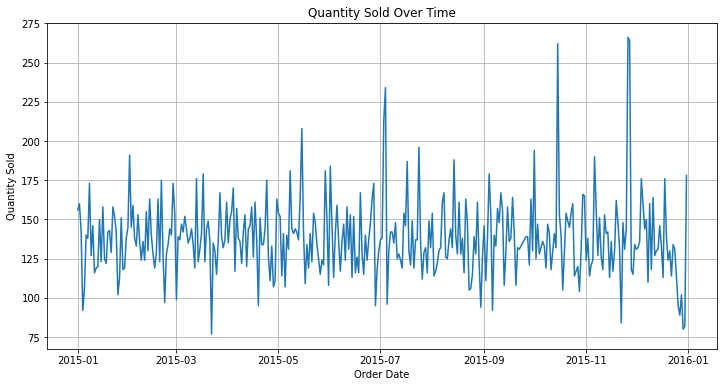

In [86]:
# Group by order date and sum the quantity
quantity_over_time = pizza_df.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()


In [87]:
print(pizza_df.dtypes)

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object


First 5 rows of the dataset:
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone C

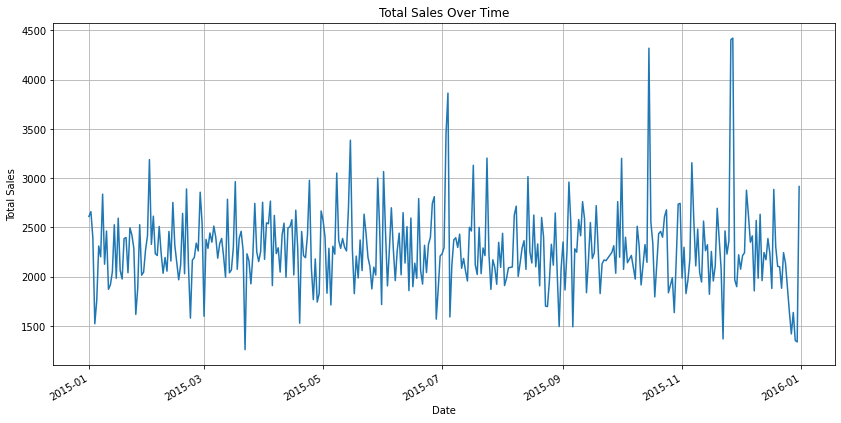

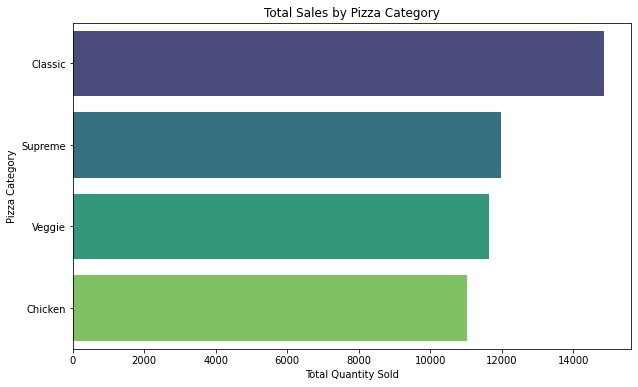

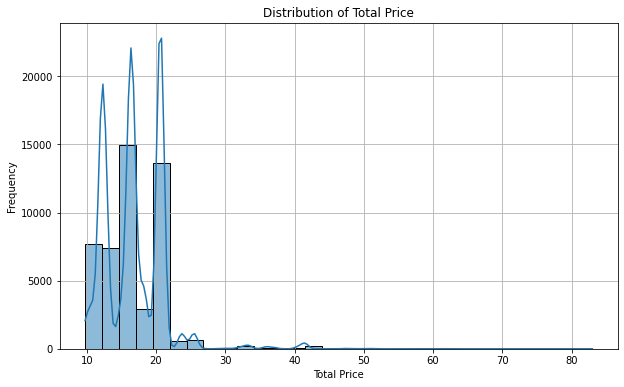

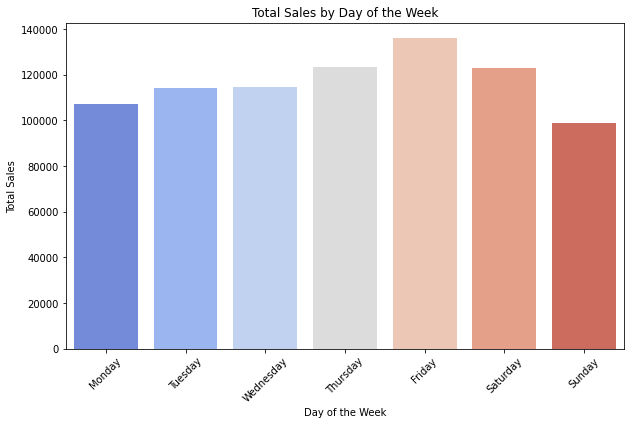

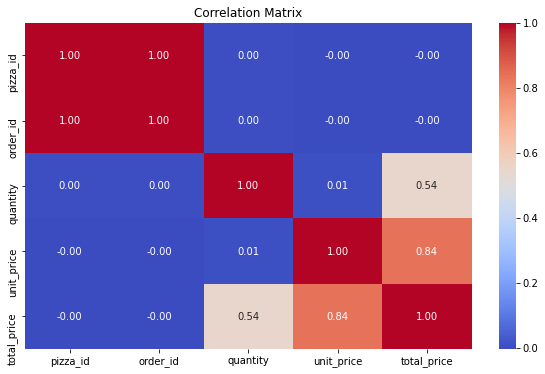

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (ensure the path is correct)
# pizza_df = pd.read_csv('path_to_your_data.csv')  # Uncomment and modify as needed

# Inspect the data
print("First 5 rows of the dataset:")
print(pizza_df.head())
print("\nDataset Info:")
print(pizza_df.info())
print("\nDataset Description:")
print(pizza_df.describe())



# Data types
print("\nData Types:")
print(pizza_df.dtypes)




# Add new features if needed
pizza_df['day_of_week'] = pizza_df['order_date'].dt.day_name()
pizza_df['month'] = pizza_df['order_date'].dt.month_name()

# Analyzing overall sales trend over time
plt.figure(figsize=(14, 7))
sales_over_time = pizza_df.groupby('order_date')['total_price'].sum()
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# Analyzing pizza sales by category
sales_by_category = pizza_df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette='viridis')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Category')
plt.show()

# Analyzing sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(pizza_df['total_price'], bins=30, kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Analyzing sales by day of the week
sales_by_day = pizza_df.groupby('day_of_week')['total_price'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='coolwarm')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Correlation analysis for numeric features
numeric_cols = pizza_df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 7. Stationarity Check

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

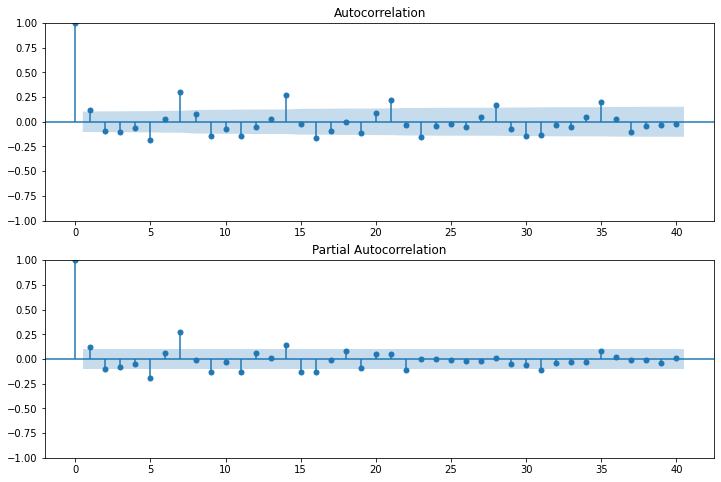

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(quantity_over_time, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(quantity_over_time, lags=40, ax=ax2)
     

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
# H0: it is not stationary
# H1: it is stationary

def adf_test(sales):
    result = adfuller(sales)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print(f'# Lags used: {result[2]}')
    print(f'No of observations used: {result[3]}')
    if result[1] <= 0.05:
        print('we reject the null hypothesis, The series is stationary')
    else:
        print('Not enough statistical evidence to reject null hypothesis, The series is not stationary')

adf_test(quantity_over_time)

ADF Statistic: -5.208670
p-value: 0.000008
# Lags used: 15
No of observations used: 342
we reject the null hypothesis, The series is stationary


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
eval_data = pizza_df.groupby(['order_date', 'pizza_name'])['quantity'].sum().unstack().fillna(0)

In [21]:
eval_data.head()

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,8.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,11.0,2.0,7.0,4.0,9.0,5.0
2015-01-03,7.0,8.0,0.0,1.0,11.0,5.0,3.0,5.0,4.0,7.0,...,7.0,6.0,1.0,5.0,4.0,3.0,2.0,2.0,9.0,7.0
2015-01-04,9.0,0.0,2.0,2.0,5.0,4.0,1.0,4.0,2.0,4.0,...,4.0,3.0,0.0,1.0,4.0,3.0,4.0,3.0,5.0,1.0
2015-01-05,2.0,3.0,2.0,0.0,6.0,8.0,2.0,9.0,5.0,4.0,...,2.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,2.0


In [22]:
one_pizza = eval_data['The Barbecue Chicken Pizza']

In [23]:
# split train and test
train = one_pizza[:-7]
test = one_pizza[-7:]
     

# 8. Modeling with ARIMA

In [24]:
# Fit Arima model
ari_model = ARIMA(train, order=(1, 1, 0))
ari_result = ari_model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
# forecast
ari_forecast = ari_result.get_forecast(steps=len(test))
ari_fore_values = ari_forecast.predicted_mean

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
ari_predict = ari_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
ari_predict.index = test.index

In [28]:
# concat test and ari_predict without changing the index of test, test is a pandas series

concatenated_series = pd.concat([test, ari_predict], axis=1)
concatenated_series.columns = ['Actual', 'Predicted']
concatenated_series

,Actual,Predicted
order_date,,
2015-12-24,4.0,4.970012
2015-12-26,5.0,5.500450
2015-12-27,4.0,5.227277
2015-12-28,2.0,5.367959
2015-12-29,4.0,5.295509
2015-12-30,6.0,5.332820
2015-12-31,10.0,5.313605


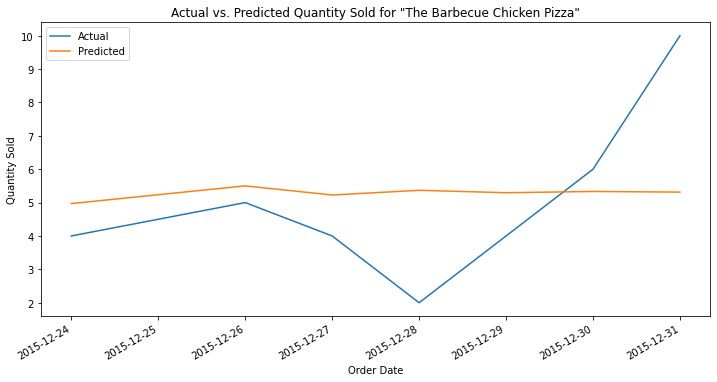

In [29]:
concatenated_series.plot(figsize=(12, 6))
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold for "The Barbecue Chicken Pizza"')
plt.show()

# 9. Model Evaluation

In [30]:
# Evaluate the model
mae = mean_absolute_error(test, ari_fore_values)
mse = mean_squared_error(test, ari_fore_values)
rmse = np.sqrt(mse)

print(f'ARIMA MAE: {mae}')
print(f'ARIMA MSE: {mse}')
print(f'ARIMA RMSE: {rmse}')

ARIMA MAE: 1.8163972880345898
ARIMA MSE: 5.446642862241798
ARIMA RMSE: 2.3338043753155056


# 10. Modeling with SARIMA

In [31]:
# fit SARIMA model
sari_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sari_result = sari_model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
# sarima forecast
sari_forecast = sari_result.get_forecast(steps=len(test))
sari_fore_values = sari_forecast.predicted_mean

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [33]:
# Evaluate Sarima
mae = mean_absolute_error(test, sari_fore_values)
mse = mean_squared_error(test, sari_fore_values)
rmse = np.sqrt(mse)

print(f'SARIMAX MAE: {mae}')
print(f'SARIMAX MSE: {mse}')
print(f'SARIMAX RMSE: {rmse}')

SARIMAX MAE: 2.5756664199803967
SARIMAX MSE: 8.296204717324516
SARIMAX RMSE: 2.880313301938613


In [34]:
sari_predict = sari_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
sari_predict.index = test.index

In [36]:
sari_predict

order_date
2015-12-24    7.277273
2015-12-26    7.484898
2015-12-27    5.527104
2015-12-28    6.337986
2015-12-29    6.738601
2015-12-30    5.870504
2015-12-31    6.465693
Name: predicted_mean, dtype: float64

In [37]:
concatenated_sarima = pd.concat([test, sari_predict] , axis=1)
concatenated_sarima.columns = ['Actual', 'Predicted']
concatenated_sarima

,Actual,Predicted
order_date,,
2015-12-24,4.0,7.277273
2015-12-26,5.0,7.484898
2015-12-27,4.0,5.527104
2015-12-28,2.0,6.337986
2015-12-29,4.0,6.738601
2015-12-30,6.0,5.870504
2015-12-31,10.0,6.465693


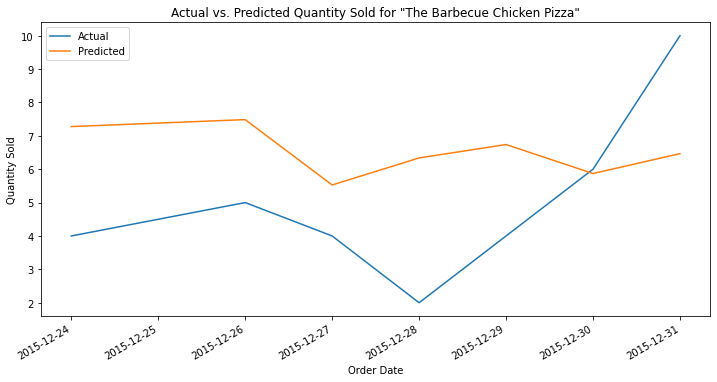

In [38]:
concatenated_sarima.plot(figsize=(12, 6))
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold for "The Barbecue Chicken Pizza"')
plt.show()

# 12. Creating Predictions and Purchase Orders

In [44]:
pizza_df = pizza_df[['order_date', 'pizza_name', 'quantity']]

In [45]:
sales_summary = pizza_df.groupby(['order_date', 'pizza_name']).sum().reset_index()

In [46]:
sales_summary.head()

,order_date,pizza_name,quantity
0,2015-01-01,The Barbecue Chicken Pizza,11
1,2015-01-01,The Big Meat Pizza,5
2,2015-01-01,The Calabrese Pizza,1
3,2015-01-01,The California Chicken Pizza,4
4,2015-01-01,The Chicken Alfredo Pizza,2


In [47]:
# reshape data for time series modeling
sales_pivot = sales_summary.pivot(index='order_date', columns='pizza_name', values='quantity').fillna(0)

In [50]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ensure your index is a datetime index with frequency
sales_pivot.index = pd.to_datetime(sales_pivot.index)

# Attempt to infer the frequency
sales_pivot = sales_pivot.asfreq('W')  # Example: 'W' for weekly data; use the appropriate frequency

# Dictionary to store fitted ARIMA models
arima_models = {}

# Loop through each pizza and fit ARIMA model
for pizza_name in sales_pivot.columns:
    try:
        # Fit ARIMA model (order can be adjusted based on your data's requirements)
        model = ARIMA(sales_pivot[pizza_name], order=(1, 1, 0))
        model_fit = model.fit()
        arima_models[pizza_name] = model_fit
        print(f'ARIMA model for {pizza_name} fitted successfully')
    except Exception as e:
        print(f'ARIMA model for {pizza_name} failed to fit. Error: {e}')


ARIMA model for The Barbecue Chicken Pizza fitted successfully
ARIMA model for The Big Meat Pizza fitted successfully
ARIMA model for The Brie Carre Pizza fitted successfully
ARIMA model for The Calabrese Pizza fitted successfully
ARIMA model for The California Chicken Pizza fitted successfully
ARIMA model for The Chicken Alfredo Pizza fitted successfully
ARIMA model for The Chicken Pesto Pizza fitted successfully
ARIMA model for The Classic Deluxe Pizza fitted successfully
ARIMA model for The Five Cheese Pizza fitted successfully
ARIMA model for The Four Cheese Pizza fitted successfully
ARIMA model for The Greek Pizza fitted successfully
ARIMA model for The Green Garden Pizza fitted successfully
ARIMA model for The Hawaiian Pizza fitted successfully
ARIMA model for The Italian Capocollo Pizza fitted successfully
ARIMA model for The Italian Supreme Pizza fitted successfully
ARIMA model for The Italian Vegetables Pizza fitted successfully
ARIMA model for The Mediterranean Pizza fitted s

In [51]:
# Generate predictions for one week
prediction_days = 7
predictions_arima = {}

for pizza_name, model in arima_models.items():
    predictions_arima[pizza_name] = model.predict(start=len(sales_pivot), end=len(sales_pivot) + prediction_days - 1)

In [52]:
predictions_df = pd.DataFrame(predictions_arima)

In [53]:
predictions_df.index = pd.date_range(start=sales_pivot.index[-1], periods=prediction_days, freq='D')

In [54]:
ingredients_df = ingred_df[['pizza_name', 'pizza_ingredients', 'Items_Qty_In_Grams']]

In [55]:
# change column name to items_qty
ingredients_df.rename(columns={'Items_Qty_In_Grams': 'items_qty'}, inplace=True)

In [56]:
predictions_df

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2015-12-27,8.178917,5.510756,0.371814,1.0,5.085078,1.193286,4.241997,7.426426,1.551330,2.650051,...,3.092439,3.122807,0.537763,2.0,3.161852,2.284893,2.142685,3.066621,5.0,5.936878
2015-12-28,5.995999,5.249884,0.766432,1.0,3.998190,0.718642,3.470719,7.755413,1.752635,3.561232,...,1.997864,3.507541,0.751426,2.0,3.513098,2.540582,1.489820,2.212437,5.0,7.813421
2015-12-29,7.136278,5.383126,0.518538,1.0,4.564752,0.907437,3.949681,7.566714,1.662315,2.946208,...,2.570447,3.338798,0.652663,2.0,3.365900,2.449159,1.862830,2.565492,5.0,6.663805
2015-12-30,6.540636,5.315072,0.674261,1.0,4.269421,0.832342,3.652246,7.674947,1.702839,3.361334,...,2.270923,3.412808,0.698315,2.0,3.427587,2.481848,1.649714,2.419565,5.0,7.368088
2015-12-31,6.851778,5.349831,0.576438,1.0,4.423368,0.862212,3.836953,7.612868,1.684657,3.081134,...,2.427607,3.380348,0.677213,2.0,3.401735,2.470160,1.771476,2.479880,5.0,6.936627
2016-01-01,6.689249,5.332078,0.637889,1.0,4.343120,0.850331,3.722250,7.648475,1.692815,3.270262,...,2.345644,3.394585,0.686967,2.0,3.412569,2.474339,1.701908,2.454951,5.0,7.200951
2016-01-02,6.774148,5.341145,0.599287,1.0,4.384951,0.855057,3.793480,7.628052,1.689155,3.142605,...,2.388520,3.388340,0.682459,2.0,3.408029,2.472845,1.741655,2.465255,5.0,7.039020


In [57]:
ingredients_df.head()
     

,pizza_name,pizza_ingredients,items_qty
0,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,The Barbecue Chicken Pizza,Red Peppers,15.0
2,The Barbecue Chicken Pizza,Green Peppers,20.0
3,The Barbecue Chicken Pizza,Tomatoes,30.0
4,The Barbecue Chicken Pizza,Red Onions,60.0


In [59]:
# Create a dictionary to store the ingredient quantities
ingredient_quantities = {}

# Iterate through each pizza in the predictions
for pizza_name in predictions_df.columns:
  # Get the predicted quantity for the pizza
  predicted_quantity = predictions_df[pizza_name].sum()

  # Get the ingredients for the pizza
  pizza_ingredients = ingredients_df[ingredients_df['pizza_name'] == pizza_name]

  # Iterate through each ingredient for the pizza
  for index, row in pizza_ingredients.iterrows():
    ingredient = row['pizza_ingredients']
    ingredient_qty = row['items_qty']

    # Calculate the required quantity of the ingredient
    required_quantity = predicted_quantity * ingredient_qty

    # Add the required quantity to the dictionary
    if ingredient not in ingredient_quantities:
        ingredient_quantities[ingredient] = 0
    ingredient_quantities[ingredient] += required_quantity

In [61]:
# Create a DataFrame from the ingredient quantities
ingredient_requirements_df = pd.DataFrame.from_dict(ingredient_quantities, orient='index', columns=['required_quantity'])

In [62]:
# Print the ingredient requirements
ingredient_requirements_df
     

,required_quantity
Barbecued Chicken,4335.030393
Red Peppers,8900.950449
Green Peppers,6262.858060
Tomatoes,27646.058145
Red Onions,40808.941291
...,...
Luganega Sausage,2825.427205
Onions,1412.713603
Soppressata Salami,1406.042109
Peperoncini verdi,710.723107


# 13. Generating a Purchase Order

In [63]:
# Create a purchase order DataFrame
purchase_order_df = ingredient_requirements_df.copy()

# Add a column for the unit of measure (assuming all ingredients are in grams)
purchase_order_df['unit'] = 'grams'

# Rename the columns for better readability
purchase_order_df = purchase_order_df.rename(columns={'required_quantity': 'quantity'})

# Add a header to the purchase order
print('Purchase Order:')
print('----------------')

# Print the purchase order table
print(purchase_order_df.to_string())


Purchase Order:
----------------
                                quantity   unit
Barbecued Chicken            4335.030393  grams
Red Peppers                  8900.950449  grams
Green Peppers                6262.858060  grams
Tomatoes                    27646.058145  grams
Red Onions                  40808.941291  grams
Barbecue Sauce               1445.010131  grams
Bacon                       20016.765369  grams
Pepperoni                   16793.615090  grams
Italian Sausage               374.818922  grams
Chorizo Sausage              1874.094609  grams
Brie Carre Cheese             124.339791  grams
Prosciutto                    124.339791  grams
Caramelized Onions                   NaN  grams
Pears                          41.446597  grams
Thyme                          20.723298  grams
Garlic                      13125.491595  grams
?duja Salami                  840.000000  grams
Pancetta                     1260.000000  grams
Friggitello Peppers           210.000000  grams
Chicken

# Model Evaluation Using MAPE

In [70]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have the predicted and actual values
# actual_values: Actual sales values for the test set
# predicted_values: Predicted sales values from your ARIMA model

# Example of predicted values from the ARIMA model
predicted_values = ari_result.forecast(steps=len(test))
actual_values = test

# Calculating MAPE
mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f'MAPE: {mape:.2f}%')


MAPE: 0.46%


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
